In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bankruptcy=pd.read_csv('bankruptcy-prevention.csv',sep = ';')

In [3]:
bankruptcy['class01']=1

In [4]:
bankruptcy=bankruptcy.rename({' class':'class'},axis=1)

In [5]:
#changing the datatype of target variable 'class', bankruptcy=0 and non-bankruptcy=1
bankruptcy.loc[bankruptcy['class'] == 'bankruptcy', 'class01'] = 0

In [6]:
bankruptcy.drop(['class'],axis=1,inplace=True)

In [7]:
bankruptcy

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class01
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


In [8]:
bankruptcy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6   class01                 250 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 13.8 KB


In [9]:
# Dividing our data into input and output variables 
X = bankruptcy.iloc[:,0:6]
Y = bankruptcy.iloc[:,6]

In [10]:
#splitting into train and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.20,random_state=0)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
KNClassifier=KNeighborsClassifier(n_neighbors=7)

In [13]:
KNClassifier.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=7)

In [14]:
import pickle
filename='finalized_model.sav'
pickle.dump(KNClassifier,open(filename,'wb'))

In [14]:
y_predict=KNClassifier.predict(xtest)
y_predict

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1], dtype=int64)

In [15]:
from sklearn.metrics import confusion_matrix
cm_knn=confusion_matrix(ytest,y_predict)
cm_knn

array([[18,  0],
       [ 1, 31]], dtype=int64)

In [16]:
#f1 score
from sklearn.metrics import f1_score
f1_score(ytest,y_predict)

0.9841269841269841

In [17]:
#train accuracy
train_pred_knn=KNClassifier.predict(xtrain)
train_accuracy_knn=np.mean(ytrain==train_pred_knn)
train_accuracy_knn

0.99

In [18]:
#test accuracy
test_pred_knn=KNClassifier.predict(xtest)
test_accuracy_knn=np.mean(ytest==test_pred_knn)
test_accuracy_knn

0.98

In [19]:
#overall KNN model accuracy
from sklearn.metrics import accuracy_score
knn_accuracy=accuracy_score(ytest,y_predict)
knn_accuracy

0.98

In [20]:
#performing knn model for differentv k values
acc=[]
for i in range(3,50,2):
    neigh = KNeighborsClassifier(n_neighbors = i)
    neigh.fit(xtrain, ytrain)
    train_acc = accuracy_score(neigh.predict(xtrain), ytrain)
    test_acc = accuracy_score(neigh.predict(xtest), ytest)
    acc.append([train_acc, test_acc])

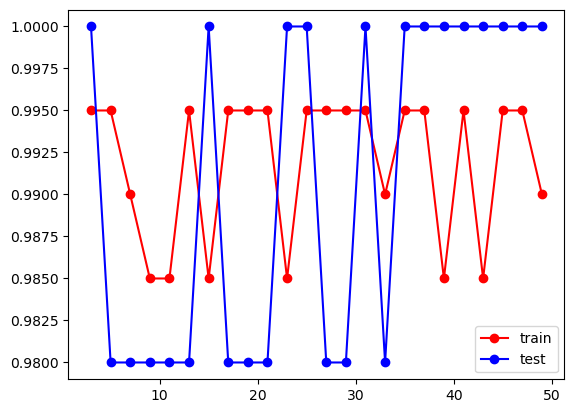

In [21]:
# train accuracy plot
plt.plot(np.arange(3,50,2),[i[0] for i in acc], "ro-")

# test accuracy plot
plt.plot(np.arange(3,50,2),[i[1] for i in acc], "bo-")

plt.legend(["train", "test"])

In [22]:
neigh = KNeighborsClassifier(n_neighbors = 6)
neigh.fit(xtrain, ytrain)

train_acc = accuracy_score(neigh.predict(xtrain), ytrain)
test_acc = accuracy_score(neigh.predict(xtest), ytest)

print(train_acc)
print(test_acc)

0.99
0.98


In [23]:
neigh = KNeighborsClassifier(n_neighbors = 9)
neigh.fit(xtrain, ytrain)

train_acc = accuracy_score(neigh.predict(xtrain), ytrain)
test_acc = accuracy_score(neigh.predict(xtest), ytest)

print(train_acc)
print(test_acc)

0.985
0.98
